# **Project - Plants Seedling Classification**
---

## **Background & Context:**

* In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.

* The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

## **Objective:**

- The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. 
- The goal of this project is to create a classifier capable of determining a plant's species from an image. by building a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

## **Data Description:**

This dataset contains images of unique plants belonging to 12 different species.
The data file names are:

- images.npy
- Label.csv

Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.

<br/>

### List of Plant Species

The dataset comprises of 12 plant species.

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet




---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing required Libraries/Packages**
---

In [ ]:

import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs
from sklearn.utils import class_weight

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from tensorflow.keras import backend

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Tensorflow modules
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              
from tensorflow.keras.models import Sequential                                                   
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization 
from tensorflow.keras.optimizers import Adam,SGD                                                 
from keras import callbacks
from keras.callbacks import ModelCheckpoint
from sklearn import preprocessing                                                                
from sklearn.model_selection import train_test_split                                             
from sklearn.metrics import confusion_matrix                                                     

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Loading the Dataset**
---

In [ ]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading the image file of the dataset
images = np.load('/content/drive/MyDrive/Colab Notebooks/Project_images.npy')

# Loading the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project_Labels.csv')

---

## **Overview of the dataset**
---

* Printing the shape of the images and labels 

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


* There are 4750 RGB images of shape 128 x 128 X 3, each image having 3 channels
* There are also 4750 labels of the plant species corresponding to each images

In [ ]:
np.unique(labels)

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

* There are 12 unique labels or classes in the dataset

### **Distribution of each Class**

* Printing the unique count of the Classes and the distribution of the images 

In [ ]:
count=labels.value_counts()
print(count)
print()
print('*'*10)
print()
count=labels.value_counts(normalize=True)
print(count)

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

**********

Label                    
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
dtype: float64


**Observations:**

- The Class "Loose Silky-bent" is the plant species with more number of images(almost 14%)
- The "Common Wheat" & "Maize" is the least plant species with less number of images. There are only 4.7% ofimages
- We see that the classes are not uniformly distributed and needs to be handled


### **Plotting few random Images and its corresponding labels**

In [ ]:
def plot_images(images,labels1):
  num_classes=12                                                                # Number of Classes
  categories=np.unique(labels1)   
  keys=dict(labels1['Label'])                                                   # Obtaing the unique classes from labels
  rows = 5                                                                      # Defining number of rows=5
  cols = 5                                                                      # Defining number of columns=5
  fig = plt.figure(figsize=(20, 15))                                            # Defining the figure size to 20x15
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels1))                     # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                    # Adding subplots with 5 rows and 5 columns
          ax.imshow(images[random_index, :])                                    # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

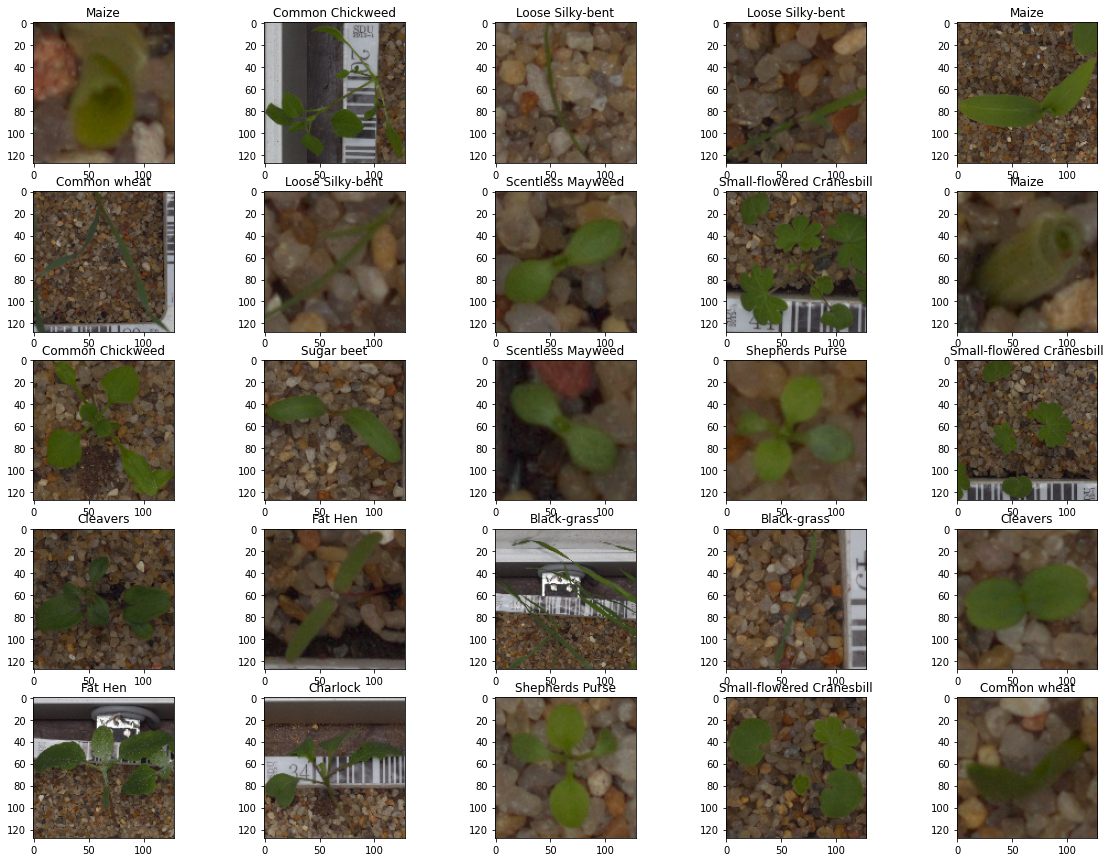

In [ ]:
plot_images(images,labels)

## **Treating images based on BGR vs RGB**

---

* Checking the images for BGR vs RGB format


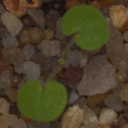

In [ ]:
cv2_imshow(images[5])

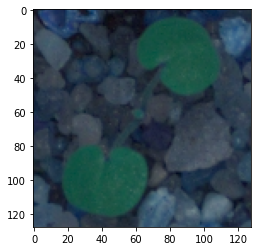

In [ ]:
plt.imshow(images[5])

**Observations:**

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib, as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- We will convert these BGR images to RGB images so we could interpret them easily.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

* The images were converted to RGB format

## **Exploratory Data Analysis** 
---

In [ ]:
count=labels.value_counts()
print(count)
print()
print('*'*10)
print()
count=labels.value_counts(normalize=True)
print(count)

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

**********

Label                    
Loose Silky-bent             0.137684
Common Chickweed             0.128632
Scentless Mayweed            0.108632
Small-flowered Cranesbill    0.104421
Fat Hen                      0.100000
Charlock                     0.082105
Sugar beet                   0.081053
Cleavers                     0.060421
Black-grass                  0.055368
Shepherds Purse              0.048632
Common wheat                 0.046526
Maize                        0.046526
dtype: float64


**Observations:**

- The Class "Loose Silky-bent" is the plant species with more number of images(almost 14%)
- The "Common Wheat" & "Maize" is the least plant species with less number of images. There are only 4.7% ofimages
- We see that the classes are not uniformly distributed and needs to be handled


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

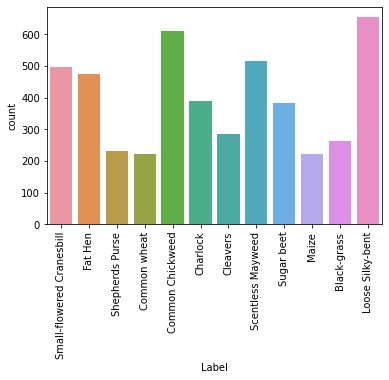

In [ ]:
# Plotting the distribution of the classes
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

**Inferences:**

- We see that the classes are not uniformly distributed
- The Class "Loose Silky-bent" seems to be having more number of images(around 654) when compared with the "Common Wheat" & "Maize" which has only 221 images.
- We might need to define class weights to balance the classes during training

## **Summary of Dataset & EDA**

* There are 4750 images in RGB format with size dimentsions of 128 x 128
* There are 4720 class labels corresponding to each images inthe image dataset
* The images are in BGR format and needs to be converted to RGB format 
* There are 12 unique classes or labels in this dataset
* The Class "Loose Silky-bent" is the plant species with more number of images (almost 14%)
* The "Common Wheat" & "Maize" is the least plant species with less number of images. There are only 4.7% of images
* The classes are not uniformly distributed and needs to be handled

## **Data Preprocessing**
---

### **Visualizing images using Gaussian Blur**

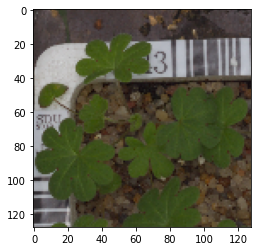

In [ ]:
plt.imshow(images[3])

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


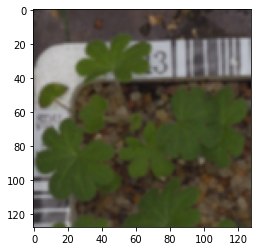

In [ ]:
plt.imshow(images_gb[3])

**Observations:**

- By applying the Gaussion Blur, the edges of the images are more clearly visible while the other portions are blurred. This would help in predicting the image better than the original image 

### **Resizing images** 

* As the size of the images is large, it may be computationally expensive to train on these larger images; We will reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images_gb[i], dimensions, interpolation=cv2.INTER_LINEAR))

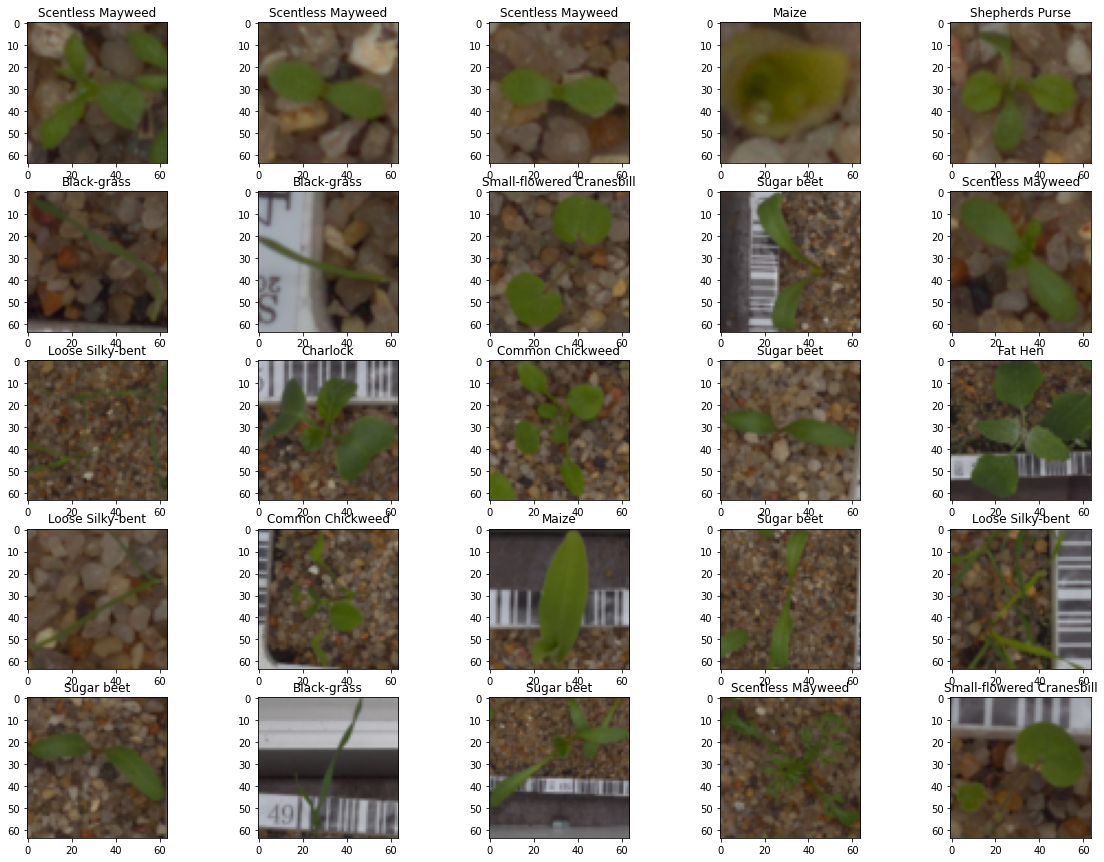

In [ ]:
# Displaying few images post applying the Gaussian Blur & resizing the shape
plot_images(np.array(images_decreased), labels)

## **Data Processing for modeling**
---

### **Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


### **Making the data compatible:**

- Encoding Target labels from names to one hot vectors
- Normalizing the values
- Applying the Class weights to balance the Classes


### **Encoding the target labels**

- Converting labels from names to one hot vectors.


In [ ]:
# Using Labelbinarizer to do the one hot encoding 

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### **Data Normalization**

- We will normalize the image pixels to range between 0-1 instead of the image pixel ranging from 0-255, by dividing the pixel values by 255

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


### **Checking the shape of the data**

In [ ]:
print(X_train_normalized.shape,y_train_encoded.shape)
print(X_val_normalized.shape,y_val_encoded.shape)
print(X_test_normalized.shape,y_test_encoded.shape)

(3847, 64, 64, 3) (3847, 12)
(428, 64, 64, 3) (428, 12)
(475, 64, 64, 3) (475, 12)


* The shape of the image dataset has been converted to 64 x 64 size

### **Initializing Class weights to balance the Classes**

- The dataset has a imbalance in the class/image distribution and needs to be handled by applying class weights for those that has less number of images when compared with classes that have more number of images

In [ ]:
labelList = np.unique(labels)
class_weights = class_weight.compute_class_weight(class_weight = "balanced", classes = np.array(labelList), y = y_train.values.reshape(-1))
class_weights = dict(zip(np.array(range(len(labelList))), class_weights))

#print calculated class weights
class_weights

{0: 1.5050860719874803,
 1: 1.0145042194092826,
 2: 1.3818247126436782,
 3: 0.6476430976430977,
 4: 1.7909683426443204,
 5: 0.8348524305555556,
 6: 0.604874213836478,
 7: 1.7909683426443204,
 8: 0.7669457735247209,
 9: 1.714349376114082,
 10: 0.7974709784411277,
 11: 1.0275106837606838}

* The class_weights variable will be applied to the model as a parameter

### **Data Preprocessing Summary:**

* Gaussian Blur has been applied on the images to reduce the noise and focus on the primary edges of the images
* The images were resized from 128 to 64 size 
* The dataset was split into training, validation & test sets with a distribution of 80%, 10% & 10%
* The Target labels were One Hot encoded using Labelbinarizer
* Normalization was applied on the image to convert it to a 0-1 range
* Class weights have been computed to balance the classes that has less distribution of images

<br/>

### We will now apply modeling techniques to determine the best model to identify the plant species

## **Model Building**
---

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):

    y_test_pred = model.predict(predictors)
    y_test_pred_classes = np.argmax(y_test_pred,axis=1)
    
    normal_y_test = np.argmax(target,axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = tf.math.confusion_matrix(normal_y_test,y_test_pred_classes)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

    acc = accuracy_score(normal_y_test, y_test_pred_classes)
    recall = recall_score(normal_y_test, y_test_pred_classes, average='weighted')  # to compute Recall
    precision = precision_score(normal_y_test, y_test_pred_classes, average='weighted')  # to compute Precision
    f1 = f1_score(normal_y_test, y_test_pred_classes, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


## **Model 0 - Simple Convolutional Neural Network (CNN)**

- Creating a base CNN model 

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(126, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt = Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

**Observations:**

- We are using the loss function - **categorical_crossentropy** as this is a multi-class classification problem and **Adam** as the optimizer
- Also, we are choosing **accuracy** as the metric to measure the performance of the model

### Fitting the model on the train data

* Applying Epochs & Batch Size parameters and class weights to balance the classes. 

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=50,
            verbose=2,
            class_weight = class_weights,
)

Epoch 1/50
77/77 - 12s - loss: 2.3389 - accuracy: 0.1469 - val_loss: 1.9997 - val_accuracy: 0.2547 - 12s/epoch - 156ms/step
Epoch 2/50
77/77 - 2s - loss: 1.6928 - accuracy: 0.3824 - val_loss: 1.5727 - val_accuracy: 0.3949 - 2s/epoch - 31ms/step
Epoch 3/50
77/77 - 2s - loss: 1.3897 - accuracy: 0.4903 - val_loss: 1.3451 - val_accuracy: 0.5280 - 2s/epoch - 31ms/step
Epoch 4/50
77/77 - 2s - loss: 1.1807 - accuracy: 0.5745 - val_loss: 1.2738 - val_accuracy: 0.5584 - 2s/epoch - 31ms/step
Epoch 5/50
77/77 - 2s - loss: 1.0721 - accuracy: 0.6181 - val_loss: 1.1801 - val_accuracy: 0.6121 - 2s/epoch - 31ms/step
Epoch 6/50
77/77 - 2s - loss: 0.9368 - accuracy: 0.6769 - val_loss: 1.1836 - val_accuracy: 0.5911 - 2s/epoch - 31ms/step
Epoch 7/50
77/77 - 2s - loss: 0.8073 - accuracy: 0.7208 - val_loss: 1.2029 - val_accuracy: 0.6098 - 2s/epoch - 31ms/step
Epoch 8/50
77/77 - 2s - loss: 0.6621 - accuracy: 0.7746 - val_loss: 1.0675 - val_accuracy: 0.6822 - 2s/epoch - 31ms/step
Epoch 9/50
77/77 - 2s - loss:

### **Model Evaluation**

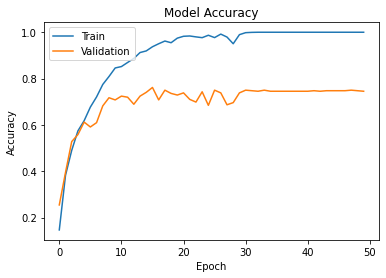

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* We can see from the above plot that **the training accuracy is overfitting**. Also, the validation accuracy is over fitting with the Training accuracy.
* We might need to apply other models to tune it further by applying BatchNormalazation, Pooling and dropout parameters




### **Model Evaluation on Training dataset**

121/121 [==============================] - 1s 7ms/step


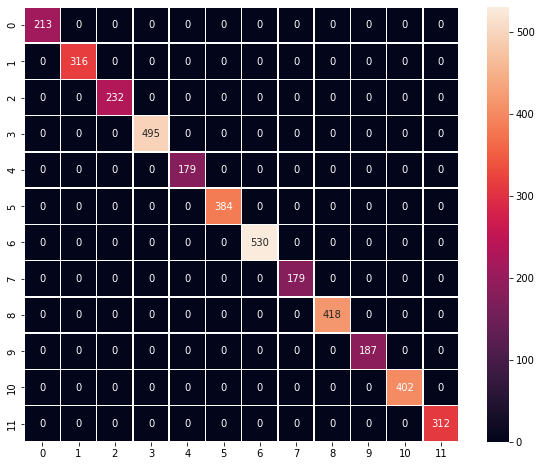

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
model.evaluate(X_train_normalized, y_train_encoded, verbose=1)
model0_TrainDF = model_performance_classification_sklearn_with_threshold(
    model, X_train_normalized, y_train_encoded,
)
model0_TrainDF

**Observations**

- The Training accuracy of this model is 100% and the other metrics are also at 100% resulting in overfitting
- All the classes are well classified and probably overfitting

### **Model Evaluation on Validation dataset**

14/14 [==============================] - 0s 7ms/step


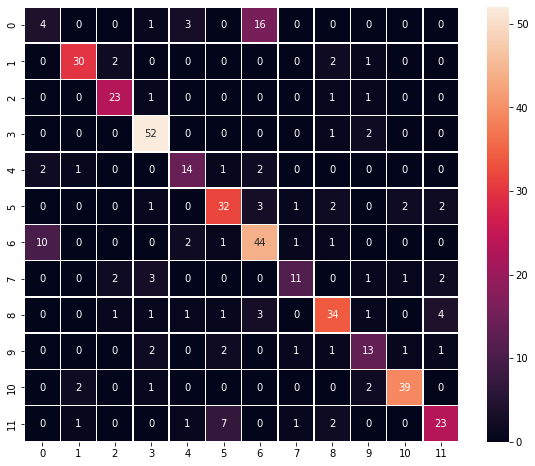

,Accuracy,Recall,Precision,F1
0,0.745327,0.745327,0.736978,0.738901


In [ ]:
model.evaluate(X_val_normalized, y_val_encoded, verbose=1)
model0_ValDF = model_performance_classification_sklearn_with_threshold(
    model, X_val_normalized,y_val_encoded,
)
model0_ValDF

**Observations**

- The Validation accuracy of this model is 74.5% and the other metrics also are in the same range. Precision has a higher metric
- When compared with the Training accurace, there is ~26% variance in the Accuracy scores. There is room for improvement to reduce this variance


### **Model Evaluation on Test dataset**

15/15 - 0s - loss: 2.4591 - accuracy: 0.7326 - 317ms/epoch - 21ms/step
15/15 [==============================] - 0s 7ms/step


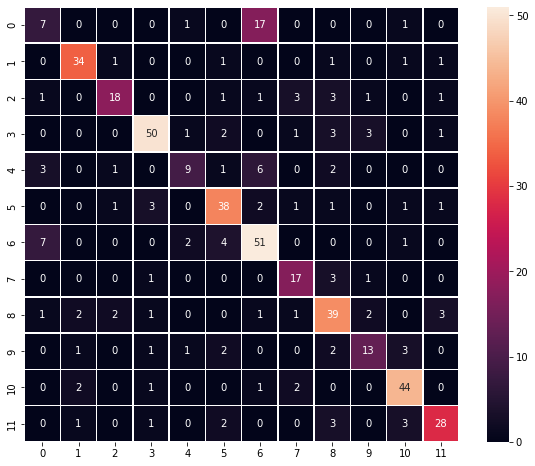

,Accuracy,Recall,Precision,F1
0,0.732632,0.732632,0.729495,0.72711


In [ ]:
model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
model0_TestDF = model_performance_classification_sklearn_with_threshold(model, X_test_normalized, y_test_encoded)
model0_TestDF

**Observations:**

- The Testing accuracy of this model is 73.3% and the other metrics also are in the same range. Precision has a higher metric
- When compared with the Training accuracy (100%), the Testing accuracy has a big gap of almsot 27% variance
- Using the classification chart, we can observe that the classes are not  predicted correctly. The classes are incorrectly classified 
- We need to tune the model with additional layers along with Pooling, Batch Normalization and dropouts as applicable. We will apply these parameters in the next model.

### **Visualizing the Predictions:**

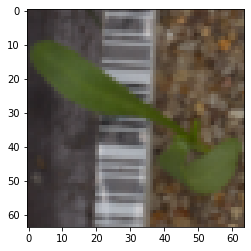

1/1 [==============================] - 0s 103ms/step
Predicted Label ['Sugar beet']
True Label Sugar beet


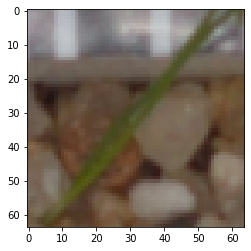

1/1 [==============================] - 0s 16ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


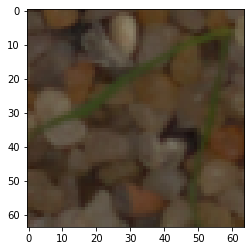

1/1 [==============================] - 0s 16ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


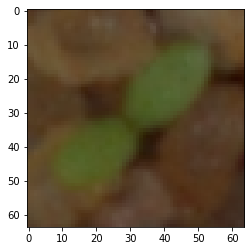

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


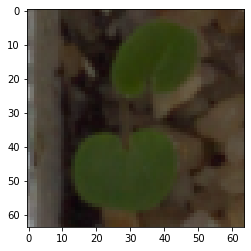

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


In [ ]:
# Visualizing the predicted and correct label of images from test data
rows = 1                                                                        
cols = 5                                                                        
for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, 400)    
      plt.imshow(X_test[random_index])
      plt.show()

      print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[random_index].reshape(1,64,64,3)))))   
      print('True Label', enc.inverse_transform(y_test_encoded)[random_index])                                               


**Inference:**

* The random images selected has the correct prediction so far in this model. 

---

## **Model 1 - Convolutional Neural Network (CNN) with addiitonal Layers**

- Creating a CNN model with addiitonal layers & tuning by using MaxPooling, Batch Normalization & Droputs. 

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dense(32, activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Dense(32, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                        

**Observations:**

- There are a total of 85,132 params with 84,812 trainable params
- We have applied Convolution along with BatchNormalization, pooling and droputs to tune the model along with the flat layer
- We are using the loss function - **categorical_crossentropy** as this is a multi-class classification problem and **Adam** as the optimizer
- Also, we are choosing **accuracy** as the metric to measure the performance of the model

### Fitting the model on the train data

- Applying Epochs & Batch Size parameters and class weights to balance the classes. 

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=200,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=50,
            verbose=2,
            class_weight = class_weights,
)

Epoch 1/200
77/77 - 4s - loss: 2.5024 - accuracy: 0.0876 - val_loss: 2.4939 - val_accuracy: 0.0467 - 4s/epoch - 48ms/step
Epoch 2/200
77/77 - 1s - loss: 2.3346 - accuracy: 0.1432 - val_loss: 2.8157 - val_accuracy: 0.1332 - 1s/epoch - 15ms/step
Epoch 3/200
77/77 - 1s - loss: 1.9805 - accuracy: 0.2441 - val_loss: 4.1275 - val_accuracy: 0.1379 - 1s/epoch - 15ms/step
Epoch 4/200
77/77 - 1s - loss: 1.7452 - accuracy: 0.3091 - val_loss: 3.0697 - val_accuracy: 0.0654 - 1s/epoch - 15ms/step
Epoch 5/200
77/77 - 1s - loss: 1.6754 - accuracy: 0.3442 - val_loss: 4.2307 - val_accuracy: 0.0584 - 1s/epoch - 15ms/step
Epoch 6/200
77/77 - 1s - loss: 1.5965 - accuracy: 0.3717 - val_loss: 2.8036 - val_accuracy: 0.1939 - 1s/epoch - 15ms/step
Epoch 7/200
77/77 - 1s - loss: 1.5088 - accuracy: 0.4047 - val_loss: 2.0689 - val_accuracy: 0.2921 - 1s/epoch - 15ms/step
Epoch 8/200
77/77 - 1s - loss: 1.4395 - accuracy: 0.4409 - val_loss: 1.6932 - val_accuracy: 0.3785 - 1s/epoch - 15ms/step
Epoch 9/200
77/77 - 1s -

### **Model Evaluation**

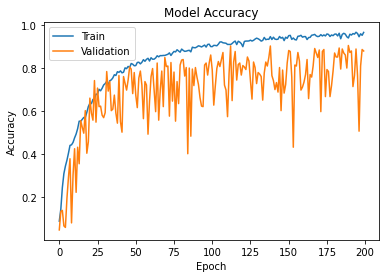

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* We can see from the above plot that **the training accuracy of the  model and the validation accuracy are good but there is variance that can be tuned further.**
* The model seems to be having a varying overfit on the data
* We can check on further tuning on the models to achieve a higher accuracy

### **Model Evaluation on Training dataset**

121/121 [==============================] - 1s 5ms/step


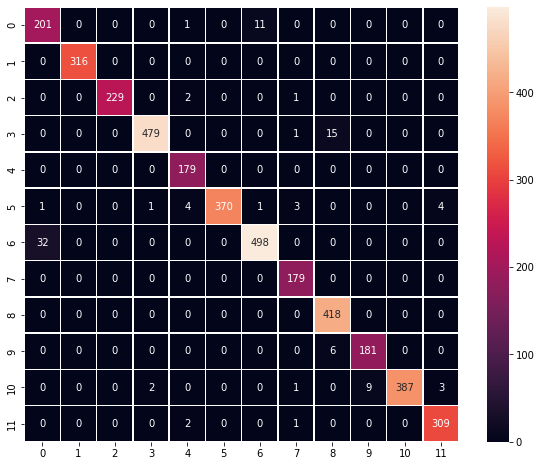

,Accuracy,Recall,Precision,F1
0,0.973746,0.973746,0.974874,0.973941


In [ ]:
model.evaluate(X_train_normalized, y_train_encoded, verbose=1)
model1_TrainDF = model_performance_classification_sklearn_with_threshold(
    model, X_train_normalized, y_train_encoded,
)
model1_TrainDF

**Observations**

- The Training accuracy of this model is 97.4% and the other metrics also are in the same range. It has a good accuracy score
- We can observe that some of the classes are not predicted correctly
- Except for the classes 1, 2, 5, 9 & 10 which are well classified, the other classes are not classified properly with some false classifications


### **Model Evaluation on Validation dataset**

14/14 [==============================] - 0s 6ms/step


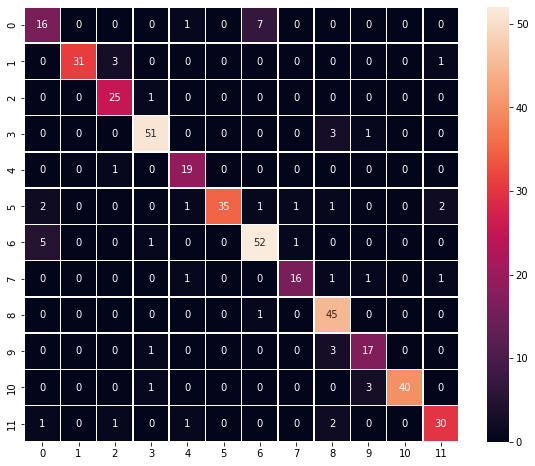

,Accuracy,Recall,Precision,F1
0,0.880841,0.880841,0.887867,0.881465


In [ ]:
model.evaluate(X_val_normalized, y_val_encoded, verbose=1)
model1_ValDF = model_performance_classification_sklearn_with_threshold(
    model, X_val_normalized,y_val_encoded,
)
model1_ValDF

**Observations**

- The Validation accuracy of this model is 88% and the other metrics also are in the same range. Precision has a higher metric
- When compared with the Training accurace, there is ~10% variance in the Accuracy scores. There is room for improvement to reduce this variance

### **Model Evaluation on Test dataset**

15/15 - 0s - loss: 0.5750 - accuracy: 0.8863 - 207ms/epoch - 14ms/step
15/15 [==============================] - 0s 5ms/step


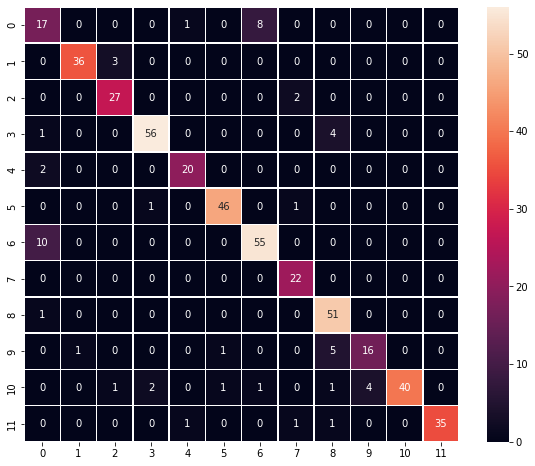

,Accuracy,Recall,Precision,F1
0,0.886316,0.886316,0.894756,0.887596


In [ ]:
model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
model1_TestDF = model_performance_classification_sklearn_with_threshold(model, X_test_normalized, y_test_encoded)
model1_TestDF

**Observations:**

- The Testing accuracy of this model is 88.6% and the other metrics also are in the same range. The accuracy is very good and also the Precision has a higher metric which is good. This would help to determine more positive predictions
- When compared with the Training accuracy (97.4%), the Testing accuracy looks very good with only around 9% variance between the two
- Using the classification chart, we can observe that the classes are  classified correctly for most of the classes except for the classes 0, 6, 8 & 9. We can look at tuning it further to achieve better accuracy

### **Generating the predictions using test data**

In [ ]:
y_pred=model.predict(X_test_normalized)
y_pred

15/15 [==============================] - 0s 5ms/step


array([[2.5825295e-10, 1.8731525e-11, 1.0227022e-10, ..., 7.6328673e-05,
        3.5734458e-05, 6.1272149e-06],
       [3.6871587e-08, 1.3989663e-03, 1.0832313e-03, ..., 2.1792054e-03,
        9.9502015e-01, 3.6656304e-05],
       [4.4761779e-07, 6.3672098e-03, 4.6234634e-03, ..., 6.0020573e-03,
        9.8069340e-01, 3.5219963e-04],
       ...,
       [9.8092252e-01, 8.8385230e-11, 1.7658030e-08, ..., 2.3761793e-12,
        5.3023858e-10, 3.4472514e-09],
       [6.8217845e-09, 3.8922789e-12, 3.1978364e-09, ..., 5.4159387e-05,
        1.3753737e-11, 1.8412022e-06],
       [1.6231765e-03, 2.2416206e-02, 1.8579045e-01, ..., 7.3115951e-03,
        1.3829044e-01, 6.7066081e-02]], dtype=float32)

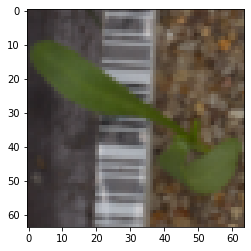

1/1 [==============================] - 0s 85ms/step
Predicted Label ['Sugar beet']
True Label Sugar beet


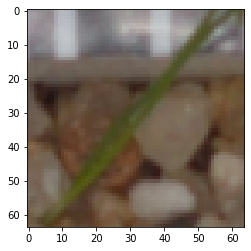

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Black-grass']
True Label Loose Silky-bent


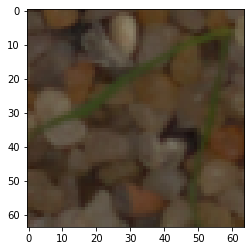

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Loose Silky-bent']
True Label Loose Silky-bent


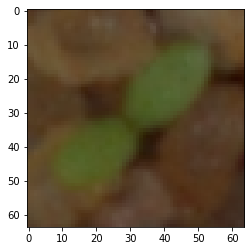

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


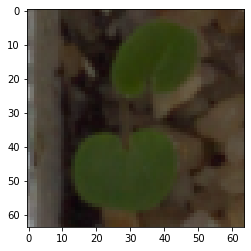

1/1 [==============================] - 0s 20ms/step
Predicted Label ['Cleavers']
True Label Small-flowered Cranesbill


In [ ]:
# Visualizing the predicted and correct label of images from test data
rows = 1                                                                        
cols = 5                                                                        
for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, 400)    
      plt.imshow(X_test[random_index])
      plt.show()

      print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[random_index].reshape(1,64,64,3)))))   
      print('True Label', enc.inverse_transform(y_test_encoded)[random_index])       

**Inference:**

* We can observe that some of the random images has few incorrect classifications in this model. 

## **Model 2 - CNN with Data Augumentation**

---


Creating a CNN model sequentially by using Data Augumentation to check if we can improve the model performance and metrics further


In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# All images to be rescaled by 1/255.
# Applying the Data Augmentation levers
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = True, 
                              height_shift_range= 0.1, 
                              width_shift_range=0.1, 
                              rotation_range=20, 
                              shear_range = 0.1,
                              zoom_range=0.1, 
                              fill_mode='nearest'
                              )
#test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))
# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dense(32, activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Dense(32, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                        

**Observations:**

- There are a total of 85,132 params with 84,812 trainable params
- We have applied Convolution along with BatchNormalization, pooling and droputs to tune the model along with the flat layer
- We will appy Data Augmentation on the Imgae dataset by applying the various parameters
- We are using the loss function - **categorical_crossentropy** as this is a multi-class classification problem and **Adam** as the optimizer
- Also, we are choosing **accuracy** as the metric to measure the performance of the model

### Fitting the model on the train data

- Applying Data Augumentation function on the training images along with Epochs & Batch Size parameters. 


In [ ]:
# Epochs
epochs = 200
# Batch size
batch_size = 30

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/200
128/128 [==============================] - 7s 44ms/step - loss: 2.4939 - accuracy: 0.1124 - val_loss: 2.4278 - val_accuracy: 0.1028
Epoch 2/200
128/128 [==============================] - 5s 41ms/step - loss: 2.3580 - accuracy: 0.1763 - val_loss: 2.4823 - val_accuracy: 0.1285
Epoch 3/200
128/128 [==============================] - 5s 41ms/step - loss: 1.9786 - accuracy: 0.3212 - val_loss: 2.4924 - val_accuracy: 0.1682
Epoch 4/200
128/128 [==============================] - 5s 42ms/step - loss: 1.7392 - accuracy: 0.3752 - val_loss: 4.4700 - val_accuracy: 0.1659
Epoch 5/200
128/128 [==============================] - 5s 40ms/step - loss: 1.6527 - accuracy: 0.4192 - val_loss: 1.9388 - val_accuracy: 0.3318
Epoch 6/200
128/128 [==============================] - 5s 41ms/step - loss: 1.5601 - accuracy: 0.4396 - val_loss: 2.0940 - val_accuracy: 0.2103
Epoch 7/200
128/128 [==============================] - 5s 41ms/step - loss: 1.5004 - accuracy: 0.4600 - val_loss: 1.2419 - val_accuracy:

### **Model Evaluation**

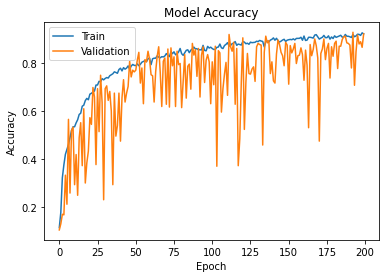

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* We can see from the above plot that **the training accuracy of the  model and the validation accuracy are very good.**
* The Training and Validation accuracy scores are well aligned
* The model seems to be having a good fit without overfitting
* This seems to be a good model to predict the images


### **Model Evaluation on Training dataset**

121/121 [==============================] - 1s 6ms/step


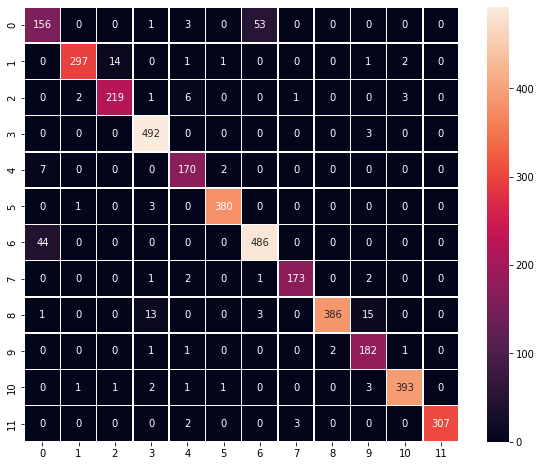

,Accuracy,Recall,Precision,F1
0,0.946452,0.946452,0.947343,0.946507


In [ ]:
model.evaluate(X_train_normalized, y_train_encoded, verbose=1)
model2_TrainDF = model_performance_classification_sklearn_with_threshold(
    model, X_train_normalized, y_train_encoded,
)
model2_TrainDF

**Observations**

- The Training accuracy of this model is 94.6% and the other metrics also are in the same range. It has a good accuracy score
- We can observe that most of the classes are predicted correctly
- Except for the classes 0, 3, 6 & 9, all other classes are well classified. 


### **Model Evaluation on Validation dataset**

14/14 [==============================] - 0s 6ms/step


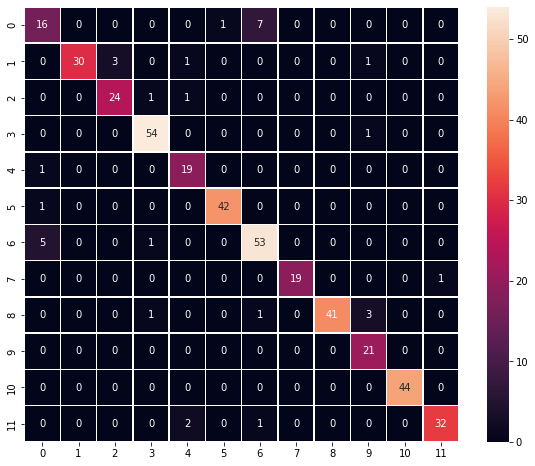

,Accuracy,Recall,Precision,F1
0,0.922897,0.922897,0.927033,0.923229


In [ ]:
model.evaluate(X_val_normalized, y_val_encoded, verbose=1)
model2_ValDF = model_performance_classification_sklearn_with_threshold(
    model, X_val_normalized,y_val_encoded,
)
model2_ValDF


**Observations**

- The Validation accuracy of this model is 92.3% and the other metrics also are in the same range. Precision has a higher metric
- When compared with the Training accurace, there is only ~4% variance in the Accuracy scores. The training and validation data seems to be fitting very well in this model

### **Model Evaluation on Test dataset**

15/15 - 0s - loss: 0.3019 - accuracy: 0.9116 - 97ms/epoch - 6ms/step
15/15 [==============================] - 0s 6ms/step


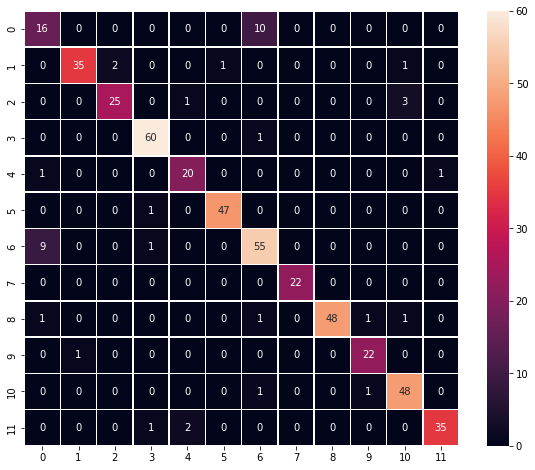

,Accuracy,Recall,Precision,F1
0,0.911579,0.911579,0.914286,0.91229


In [ ]:
model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
model2_TestDF = model_performance_classification_sklearn_with_threshold(model, X_test_normalized, y_test_encoded)
model2_TestDF


**Observations**

- We can observe that the accuracy has improved compared to our previous models and outperformed all other models so far.
- The Validation accuracy of this model is 91.1% and the other metrics also are in the same range. The accuracy is very good and also the F1 score has a higher metric which is very good. This would help to determine both positive & negative predictions more correctly
- When compared with the Training accuracy, there is only ~3% variance in the Accuracy scores. The training and testing data seems to be fitting very well in this model

### **Visualizing the Predictions:**

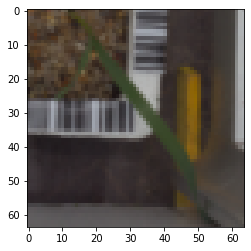

1/1 [==============================] - 0s 20ms/step
Predicted Label ['Common wheat']
True Label Common wheat


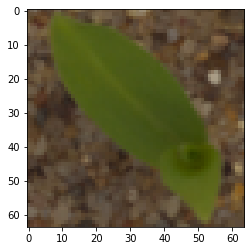

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Maize']
True Label Maize


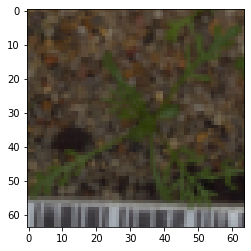

1/1 [==============================] - 0s 17ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


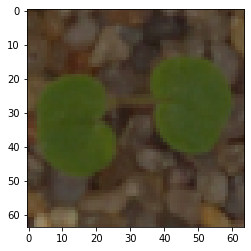

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


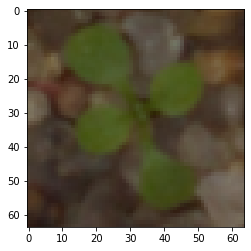

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
rows = 1                                                                        
cols = 5                                                                        
for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, 400)    
      plt.imshow(X_test[random_index])
      plt.show()

      print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[random_index].reshape(1,64,64,3)))))   
      print('True Label', enc.inverse_transform(y_test_encoded)[random_index])     

**Inference:**

* The random images selected has the correct prediction so far in this model. 

## **Model # 3 - CNN with Transfer Learning using VGG16**
---
- Creating a CNN model by leveraging an existing model VGG16 for Transfer learning  

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### Using VGG16 model for the Transfer Learing

In [ ]:
# Applying the VGG16 model
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

**Observations:**

- There are a total of 14,714,688 params with 14,714,688 trainable params

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding hidden layer with 64 neurons, relu as activation function and, he_normal as weight initializer.
new_model.add(Dense(64, activation="relu", kernel_initializer="he_normal", ))
new_model.add(Dense(64, activation="relu", kernel_initializer="he_normal", ))
new_model.add(BatchNormalization())

# Adding hidden layer with 32 neurons, relu as activation function and, he_normal as weight initializer
new_model.add(Dense(32, activation="relu", kernel_initializer="he_normal",))

# Adding Dropout with 20%
new_model.add(Dropout(0.2))

# Adding hidden layer with 16 neurons, relu as activation function and, he_normal as weight initializer
new_model.add(Dense(32, activation="relu", kernel_initializer="he_normal",))
new_model.add(Dense(16, activation="relu", kernel_initializer="he_normal",))
new_model.add(BatchNormalization())

# Adding Dropout with 20%
new_model.add(Dropout(0.2))

# Adding hidden layer with 8 neurons, relu as activation function and, he_normal as weight initializer
new_model.add(Dense(8, activation="relu", kernel_initializer="he_normal",))
new_model.add(BatchNormalization())

new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))

opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

**Observations:**

- There are a total of 14,854,484 params with 139,620 trainable params. The remaining params are either frozen or not applied
- We have used VGG16 for intitial learning and applied the layers on top of it
- We are using the loss function - **categorical_crossentropy** as this is a multi-class classification problem and **Adam** as the optimizer
- Also, we are choosing **accuracy** as the metric to measure the performance of the model


### Fitting the model on the train data

- Applying the VGG model along with Data Augumentation, Epochs & Batch Size parameters.


In [ ]:
# Epochs
epochs = 200
# Batch size
batch_size = 30


history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/200
128/128 [==============================] - 9s 54ms/step - loss: 2.4564 - accuracy: 0.1462 - val_loss: 2.4526 - val_accuracy: 0.1472
Epoch 2/200
128/128 [==============================] - 6s 45ms/step - loss: 2.2239 - accuracy: 0.2478 - val_loss: 2.1505 - val_accuracy: 0.2477
Epoch 3/200
128/128 [==============================] - 6s 43ms/step - loss: 2.0379 - accuracy: 0.2981 - val_loss: 2.0983 - val_accuracy: 0.2874
Epoch 4/200
128/128 [==============================] - 6s 44ms/step - loss: 1.8941 - accuracy: 0.3128 - val_loss: 1.8832 - val_accuracy: 0.3224
Epoch 5/200
128/128 [==============================] - 6s 45ms/step - loss: 1.8254 - accuracy: 0.3353 - val_loss: 1.7882 - val_accuracy: 0.3458
Epoch 6/200
128/128 [==============================] - 6s 43ms/step - loss: 1.7612 - accuracy: 0.3642 - val_loss: 1.8407 - val_accuracy: 0.3738
Epoch 7/200
128/128 [==============================] - 6s 48ms/step - loss: 1.7381 - accuracy: 0.3592 - val_loss: 1.6876 - val_accuracy:

### **Model Evaluation**

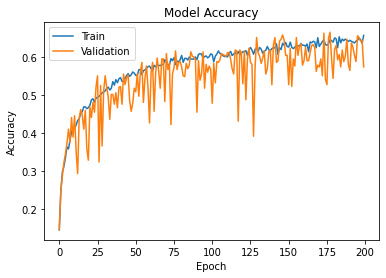

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 

* We can see from the above plot that **the training accuracy of the  model and the validation accuracy are good, but the scores are very less when compared with other previous models**
* The model seems to be having a good fit on the data but the data seems be fitting with variations

### **Model Evaluation on Training dataset**

121/121 [==============================] - 2s 16ms/step


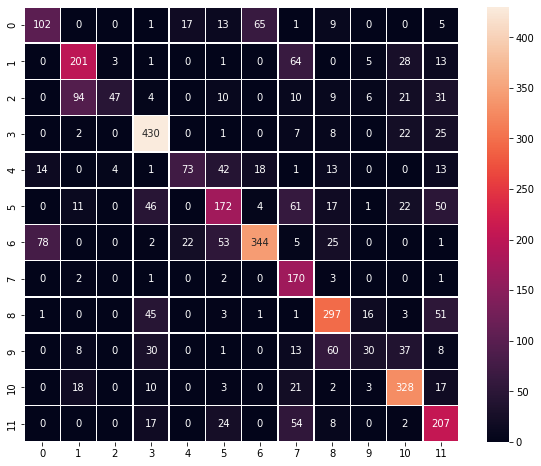

,Accuracy,Recall,Precision,F1
0,0.624123,0.624123,0.646204,0.608608


In [ ]:
new_model.evaluate(X_train_normalized, y_train_encoded, verbose=1)
model3_TrainDF = model_performance_classification_sklearn_with_threshold(
    new_model, X_train_normalized, y_train_encoded,
)
model3_TrainDF

**Observations**

- The Training accuracy of this model is 62.4% and the other metrics also are in the same range
- We can observe that most of the classes are not classified correctly and requires to be tuned further


### **Model Evaluation on Validation dataset**

14/14 [==============================] - 0s 16ms/step


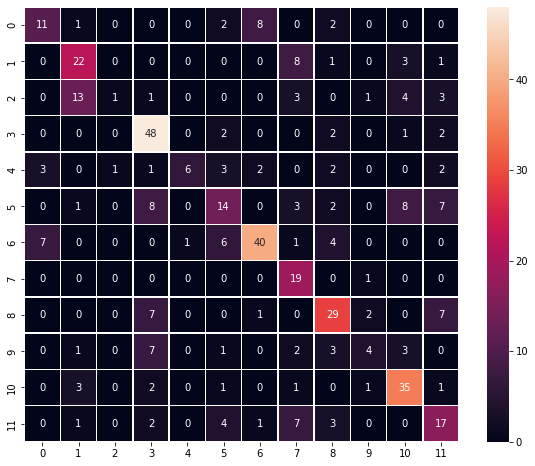

,Accuracy,Recall,Precision,F1
0,0.574766,0.574766,0.580763,0.547436


In [ ]:
new_model.evaluate(X_val_normalized, y_val_encoded, verbose=1)
model3_ValDF = model_performance_classification_sklearn_with_threshold(
    new_model, X_val_normalized,y_val_encoded,
)
model3_ValDF


**Observations**

- The Validation accuracy of this model is 57.5% and the other metrics also are in the same range. Precision has a higher metric
- When compared with the Training accuracy, there is ~5% variance in the Accuracy scores. There is room for improvement to reduce this variance


### **Model Evaluation on Test dataset**

15/15 - 1s - loss: 1.3466 - accuracy: 0.5579 - 686ms/epoch - 46ms/step
15/15 [==============================] - 0s 16ms/step


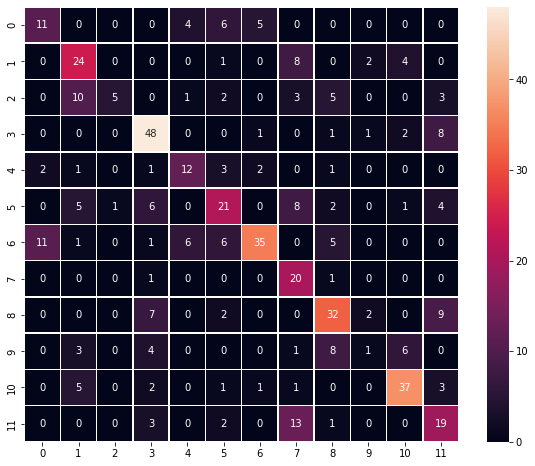

,Accuracy,Recall,Precision,F1
0,0.557895,0.557895,0.580586,0.543705


In [ ]:
new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)
model3_TestDF = model_performance_classification_sklearn_with_threshold(new_model, X_test_normalized, y_test_encoded)
model3_TestDF


**Observations**

- The Testing accuracy of this model is 55.8% and the other metrics also are in the same range. Precision has a higher metric
- When compared with the Training accuracy, there is ~7% variance in the Accuracy scores. There is room for improvement to reduce this variance
- The scores are also very less and requires tuning the model further to improve the accuracy


### **Visualizing the Predictions:**

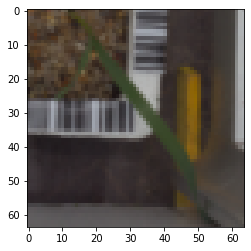

1/1 [==============================] - 0s 250ms/step
Predicted Label ['Common wheat']
True Label Common wheat


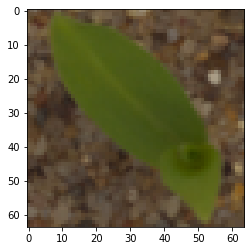

1/1 [==============================] - 0s 22ms/step
Predicted Label ['Maize']
True Label Maize


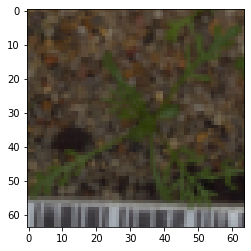

1/1 [==============================] - 0s 20ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


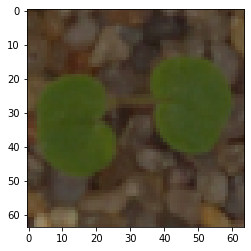

1/1 [==============================] - 0s 20ms/step
Predicted Label ['Charlock']
True Label Small-flowered Cranesbill


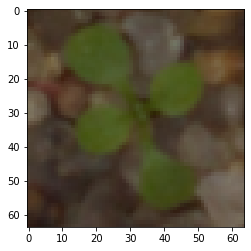

1/1 [==============================] - 0s 21ms/step
Predicted Label ['Scentless Mayweed']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
rows = 1                                                                        
cols = 5                                                                        
for i in range(cols):
    for j in range(rows):
      random_index = np.random.randint(0, 400)    
      plt.imshow(X_test[random_index])
      plt.show()

      print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[random_index].reshape(1,64,64,3)))))   
      print('True Label', enc.inverse_transform(y_test_encoded)[random_index])     

**Inference:**

* We do see that there are images incorrectly classified. Considering the accuracy scores of the training & testing were low, its expected that some of the predictions might be incorrect.

## Conclusion

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model0_TrainDF.T,
        model1_TrainDF.T,
        model2_TrainDF.T,
        model3_TrainDF.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Model 0 - Simple CNN",
    "Model 1 - CNN with Hypertuning",
    "Model 2 - CNN with Data Augmentation",
    "Model 3 - CNN with Transfer Learning",
]

print("Training performance comparison:")
print(models_train_comp_df.T)

# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        model0_TestDF.T,
        model1_TestDF.T,
        model2_TestDF.T,
        model3_TestDF.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Model 0 - Simple CNN",
    "Model 1 - CNN with Hypertuning",
    "Model 2 - CNN with Data Augmentation",
    "Model 3 - CNN with Transfer Learning",
]

print("\n\n")
print("Testing performance comparison:")
print(models_test_comp_df.T)

Training performance comparison:
                                      Accuracy    Recall  Precision        F1
Model 0 - Simple CNN                  1.000000  1.000000   1.000000  1.000000
Model 1 - CNN with Hypertuning        0.973746  0.973746   0.974874  0.973941
Model 2 - CNN with Data Augmentation  0.946452  0.946452   0.947343  0.946507
Model 3 - CNN with Transfer Learning  0.624123  0.624123   0.646204  0.608608



Testing performance comparison:
                                      Accuracy    Recall  Precision        F1
Model 0 - Simple CNN                  0.732632  0.732632   0.729495  0.727110
Model 1 - CNN with Hypertuning        0.886316  0.886316   0.894756  0.887596
Model 2 - CNN with Data Augmentation  0.911579  0.911579   0.914286  0.912290
Model 3 - CNN with Transfer Learning  0.557895  0.557895   0.580586  0.543705


**Inferences:**

- We can observe from the above comparison of the various performance metrics, the Model 2 (**CNN with Data Augmentation**) is the best model because it has the highest accuracy of Training (94.6%) & Testing (91.2%) data without overfitting and also predicted the majority of the classes better than the other models as illustratced in the Confusion Matrix
- The Model 1 CNN with Hypertuning has provided a better training accuracy (97.4%) result than the Model 2 with Data Augumentation but the testing accuracy is at 88.6%
- The test accuracy of the Model 3 is only 55.7% and the other metrics Recall, Precision & F1 almost has a similar performance score
- For this business case, the model utilizing the VGG16 - Transfer Learning has not helped in improving the model and achieve a better accuracy
- There is a 9% variance in the accuracy scores in Model 1 when compared with the 3% variance of Model 2. The performance metrics of F1, Precision and Recall are also very good in the testing scores of Model 2


###  **Model 2 has better accuracy variance and chance of predicting the results more accurately. We can use this model to classify the plant species**

---